# Image Segmentation Study 
- The purpose of this study is to find the best image segmentation method for my cmps183 project.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

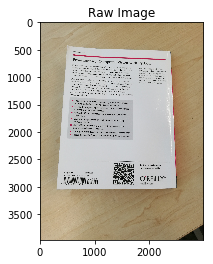

[[[ 89 133 157]
  [ 77 123 147]
  [ 78 124 148]
  ..., 
  [106 150 174]
  [104 148 172]
  [104 148 172]]

 [[ 85 129 153]
  [ 80 126 150]
  [ 77 125 149]
  ..., 
  [106 150 174]
  [105 149 173]
  [105 149 173]]

 [[ 81 128 150]
  [ 79 126 148]
  [ 83 131 155]
  ..., 
  [106 150 174]
  [105 149 173]
  [105 149 173]]

 ..., 
 [[139 171 194]
  [140 172 195]
  [141 173 196]
  ..., 
  [ 39  54  56]
  [ 37  52  55]
  [ 34  49  52]]

 [[139 171 194]
  [140 172 195]
  [140 172 195]
  ..., 
  [ 39  54  56]
  [ 36  51  54]
  [ 34  49  52]]

 [[140 172 195]
  [139 171 194]
  [139 171 194]
  ..., 
  [ 37  52  54]
  [ 35  50  53]
  [ 35  50  53]]]


In [134]:
img = cv2.imread('doc_test4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Raw Image")
plt.show()
print(img)

## Watershed Algorithm

1) First you need to threshold the image

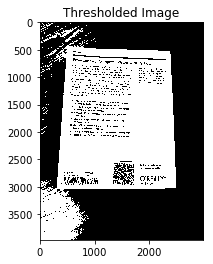

In [100]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
plt.imshow(thresh, cmap=plt.cm.gray)
plt.title('Thresholded Image')
plt.show()

2) Next we need to remove some of the noise with morphological opening.

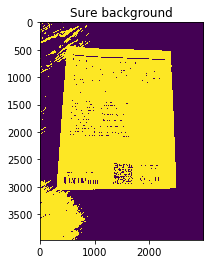

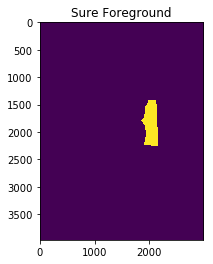

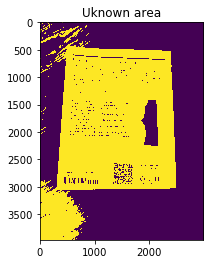

In [101]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg)
plt.title('Sure background')
plt.show()

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255,0)
plt.imshow(sure_fg)
plt.title('Sure Foreground')
plt.show()


sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
plt.imshow(unknown)
plt.title('Uknown area')
plt.show()



In [102]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown==255] = 0

In [103]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

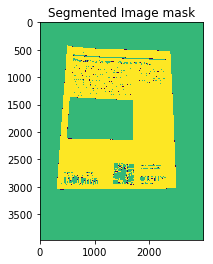

In [104]:
plt.imshow(markers)
plt.title('Segmented Image mask')
plt.show()


In [105]:
markers[markers == -1] = 0
markers[markers < 0] = 1
print(markers)
output = np.zeros(img.shape)
test = np.repeat(markers, 3, axis=1)
test.resize(img.shape)
test = 1 - test
print(test.shape)


[[0 0 0 ..., 0 0 0]
 [0 1 1 ..., 1 1 0]
 [0 1 1 ..., 1 1 0]
 ..., 
 [0 1 1 ..., 1 1 0]
 [0 1 1 ..., 1 1 0]
 [0 0 0 ..., 0 0 0]]
(3968, 2976, 3)


In [125]:
output = (1 - np.zeros(img.shape)) * test


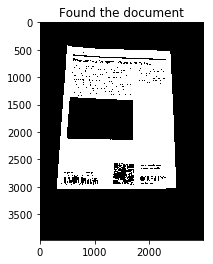

[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ..., 
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 ..., 
 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ..., 
  [0 0 0]
  [0 0 0]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ..., 
  [1 1 1]
  [1 1 1]
  [1 1 1]]]


In [107]:
output_img = output.astype(img.dtype)
plt.imshow(output_img)
plt.title('Found the document')
plt.show()
print(output_img)



In [128]:
#flood fill the 1s
h,w = output_img.shape[:2]
diff = (1,1,1)
mask = np.zeros((h+2,w+2), np.uint8)
cv2.floodFill(output_img, mask, (0,0), (50,50,50), diff, diff)
print(output_img)

[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ..., 
 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]]


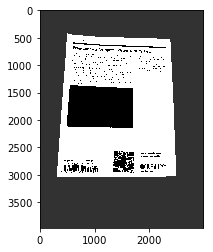

[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 ..., 
 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ..., 
  [50 50 50]
  [50 50 50]
  [50 50 50]]]


In [139]:
test2 = output_img.astype(np.uint8)
test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
test2 = cv2.cvtColor(test2, cv2.COLOR_GRAY2BGR)
plt.imshow(test2, cmap='Purples')
plt.show()
print(output_img)

In [122]:
def display_img(img):
    while(True):
        cv2.imshow('img',img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.destroyAllWindows()
                break
display_img(output_img)